Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [50]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [51]:
from glob import glob

In [52]:
from google.colab import drive

In [53]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [54]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [55]:
import os
os.chdir('/content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment')

In [56]:
!unzip -q CNN_assignment.zip

In [57]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [58]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [59]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [60]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

data_dir = '/content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [61]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [62]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [63]:
#Create a dataset containing full path of all images and class against each of them
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(path_list))
print(len(lesion_list))

2239
2239


In [64]:
dataframe_dict = dict(zip(path_list, lesion_list))
original_df =  pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df.sample(5)

,Path,Label
1081,/content/gdrive/My Drive/MachineLearning/C5-M3...,nevus
557,/content/gdrive/My Drive/MachineLearning/C5-M3...,dermatofibroma
597,/content/gdrive/My Drive/MachineLearning/C5-M3...,melanoma
81,/content/gdrive/My Drive/MachineLearning/C5-M3...,actinic keratosis
1695,/content/gdrive/My Drive/MachineLearning/C5-M3...,pigmented benign keratosis


Printing - /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg
Printing - /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0024504.jpg
Printing - /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025223.jpg
Printing - /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000139.jpg
Printing - /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000019.jpg
Printing - /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/

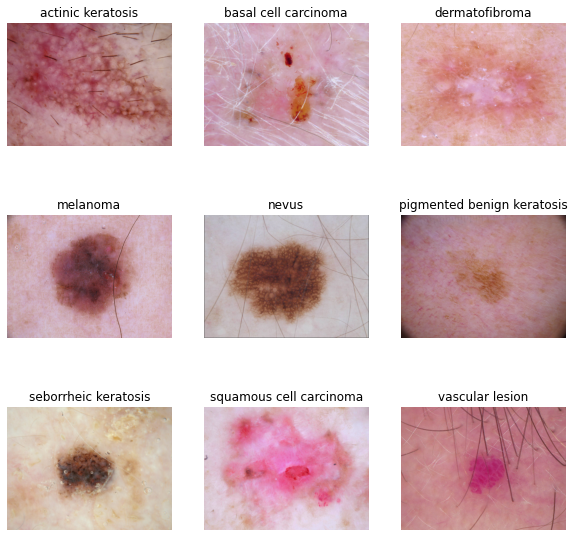

In [65]:
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(10,10))
loop = 0
for cls in class_names:
  plt.subplot(3, 3, loop + 1)
  for i in range(len(original_df)):
    if original_df.iloc[i, 1] == cls:
      #PRINT IMAGE
      print('Printing - ' + original_df.iloc[i, 0])
      plt.imshow(Image.open(original_df.iloc[i, 0]))
      plt.title(cls)        
      plt.axis("off")
      break
  loop = loop + 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [66]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [67]:
### Your code goes here

model = Sequential([
                     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                     layers.Conv2D(32,kernel_size=(3,3), activation='relu'),
                     layers.MaxPooling2D(),
                     layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
                     layers.MaxPooling2D(),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(9, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

We have chosen SparseCategoricalCrossentropy() as the loss function because our dataset was created using the default argument label_mode=int, which means that labels are int32 tensors of shape (batch_size, ). SparseCategoricalCrossentropy() is the appropriate loss function for labels in such format.

We have used Adam optimizer because it is efficient and suitable for problems requiring too many parameters to be trained

In [68]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [69]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 118336)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

### Train the model

In [70]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 51ms/step - loss: 2.3369 - accuracy: 0.2941 - val_loss: 1.6871 - val_accuracy: 0.4094
Epoch 2/20
56/56 [==============================] - 1s 19ms/step - loss: 1.5459 - accuracy: 0.4459 - val_loss: 1.4255 - val_accuracy: 0.5302
Epoch 3/20
56/56 [==============================] - 1s 19ms/step - loss: 1.3824 - accuracy: 0.5240 - val_loss: 1.4302 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 1s 19ms/step - loss: 1.2519 - accuracy: 0.5642 - val_loss: 1.5118 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1775 - accuracy: 0.5843 - val_loss: 1.4333 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 0.9871 - accuracy: 0.6529 - val_loss: 1.4896 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 0.8643 - accuracy: 0.6908 - val_loss: 1.4893 - val_accuracy: 0.5369
Epoch 8/20
5

### Visualizing training results

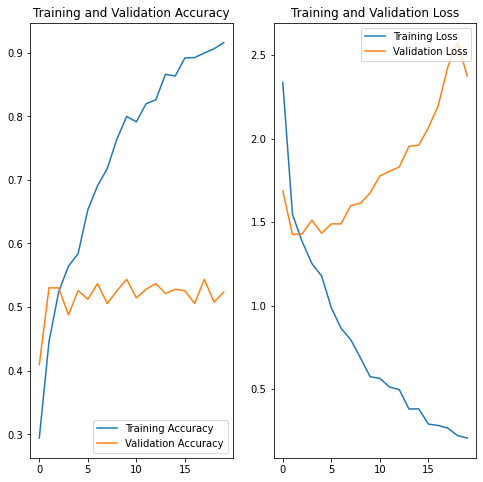

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

***Findings from the plot:***

We can see that with further epochs, the accuracy of training is increasing but the accuracy of Validation stays at around 50%. Also we can see the increase in loss for training which means convergence is happening but for validation the loss is actually increasing.

This shows that the model is overfitting, and we need to deal with overfitting in our next model.

In [72]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2)
  ]
)


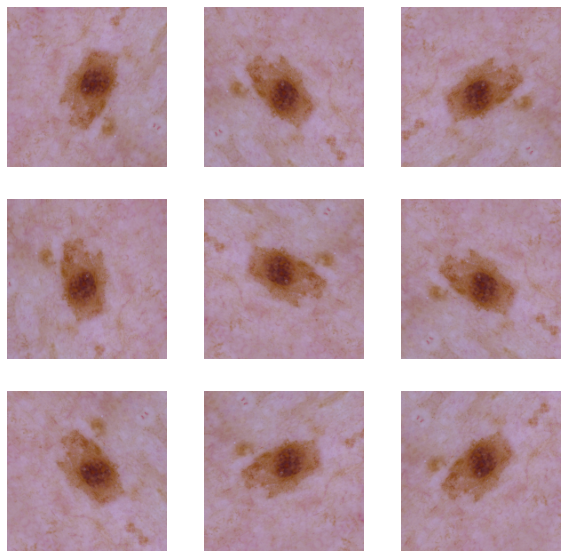

In [73]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, lables in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")



### Todo:
### Create the model, compile and train the model


In [74]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## https://www.tensorflow.org/tutorials/images/data_augmentation
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip
## Your code goes here

# We are adding an augmentation layer after rescaling, and also a dropout after the flatten to deal with the overfitting we founf in the previous model we built
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


model = Sequential(
    [
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      data_augmentation,
      layers.Conv2D(32,kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D(),   
      layers.Flatten(),
      layers.Dropout(0.2),
      layers.Dense(128, activation='relu'),
      layers.Dense(9, activation='softmax')
    ]
)

### Compiling the model

In [75]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 118336)           

### Training the model

In [77]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 23ms/step - loss: 2.4734 - accuracy: 0.2193 - val_loss: 1.9486 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 1s 20ms/step - loss: 1.7823 - accuracy: 0.3778 - val_loss: 1.6359 - val_accuracy: 0.3602
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.5803 - accuracy: 0.4392 - val_loss: 1.4769 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.5049 - accuracy: 0.4743 - val_loss: 1.4665 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4308 - accuracy: 0.4939 - val_loss: 1.5046 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4012 - accuracy: 0.5022 - val_loss: 1.5207 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3642 - accuracy: 0.5246 - val_loss: 1.4562 - val_accuracy: 0.5123
Epoch 8/20
56

### Visualizing the results

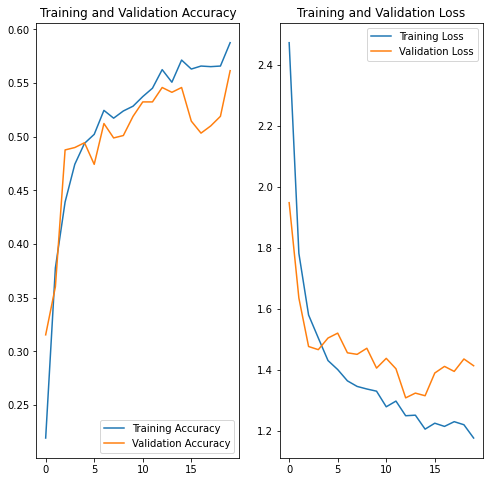

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

***Findings from the plots:***
We can see now that both training and validation accuracy are almost similar, and are increasing with more epochs. Also we can see that loss is reducing now for both training and validation. This means that overfitting problem is resolved now.

However we can see that the accuracy is not high, and is just around 55%. Which means that there is some other problem too and we need to solve it.

There is a possibility there there is class imbalance in the data, and we might have to address that problem to get a good performance out of the model. Further steps are directed towards the same...

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [79]:
## Your code goes here.
## original_df - > path_list, lesion_list

original_df.sample(5)



,Path,Label
1898,/content/gdrive/My Drive/MachineLearning/C5-M3...,seborrheic keratosis
866,/content/gdrive/My Drive/MachineLearning/C5-M3...,melanoma
433,/content/gdrive/My Drive/MachineLearning/C5-M3...,basal cell carcinoma
140,/content/gdrive/My Drive/MachineLearning/C5-M3...,basal cell carcinoma
562,/content/gdrive/My Drive/MachineLearning/C5-M3...,dermatofibroma


In [80]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

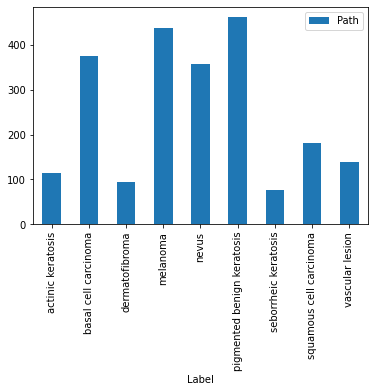

In [81]:
original_df.groupby('Label').count().plot(kind='bar')


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?       
***ANSWER***: 
seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?  
***ANSWER***
- pigmented benign keratosis    462
- melanoma                      438
- basal cell carcinoma          376
- nevus                         357

We can see there is considerable class imbalance here


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [82]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [83]:
path_to_training_dataset= data_dir
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE1938FE850>: 100%|██████████| 500/500 [00:09<00:00, 54.23 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1FAC189D0>: 100%|██████████| 500/500 [00:09<00:00, 54.39 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1939FD590>: 100%|██████████| 500/500 [00:09<00:00, 52.92 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=679x566 at 0x7FE1927AF9D0>: 100%|██████████| 500/500 [00:44<00:00, 11.18 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1AE142FD0>: 100%|██████████| 500/500 [00:41<00:00, 11.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1938F0B10>: 100%|██████████| 500/500 [00:09<00:00, 52.65 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE193921CD0>: 100%|██████████| 500/500 [00:19<00:00, 25.01 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE247414F90>: 100%|██████████| 500/500 [00:08<00:00, 57.57 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/MachineLearning/C5-M3-CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE193A0BC90>: 100%|██████████| 500/500 [00:08<00:00, 57.05 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [84]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [85]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [86]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [87]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [88]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [89]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [90]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [91]:
data_dir_train= data_dir
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [92]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [93]:
## your code goes here
# This is the third model, and we have used Augmentation to create and add 500 more images to each class to solve the class imbalance problem
# Since augmentation is already done by creating more data, there is no need to use an augmentation layer like we used in the previous model
# We will add one more conolutional layer here, reduce our Dense layer to only 64 neurons, and retain the dropout we added 

model = Sequential(
    [
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(16,kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D(),     
      layers.Conv2D(32,kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D(),   
      layers.Flatten(),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dense(9, activation='softmax')
    ]
)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [94]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 20, 64)      

#### **Todo:**  Train your model

In [95]:
epochs = 30
## Your code goes here
history = model.fit(
                      train_ds,
                      validation_data=val_ds,
                      epochs=epochs
                    )

Epoch 1/30
169/169 [==============================] - 20s 115ms/step - loss: 1.9835 - accuracy: 0.2582 - val_loss: 1.7386 - val_accuracy: 0.3378
Epoch 2/30
169/169 [==============================] - 19s 110ms/step - loss: 1.5273 - accuracy: 0.4119 - val_loss: 1.3958 - val_accuracy: 0.4454
Epoch 3/30
169/169 [==============================] - 19s 107ms/step - loss: 1.3716 - accuracy: 0.4776 - val_loss: 1.3699 - val_accuracy: 0.4729
Epoch 4/30
169/169 [==============================] - 20s 113ms/step - loss: 1.2123 - accuracy: 0.5471 - val_loss: 1.1738 - val_accuracy: 0.5657
Epoch 5/30
169/169 [==============================] - 20s 112ms/step - loss: 1.1084 - accuracy: 0.5916 - val_loss: 1.1579 - val_accuracy: 0.5650
Epoch 6/30
169/169 [==============================] - 19s 108ms/step - loss: 0.9718 - accuracy: 0.6443 - val_loss: 0.9978 - val_accuracy: 0.6303
Epoch 7/30
169/169 [==============================] - 19s 108ms/step - loss: 0.8783 - accuracy: 0.6816 - val_loss: 1.1094 - val_ac

#### **Todo:**  Visualize the model results

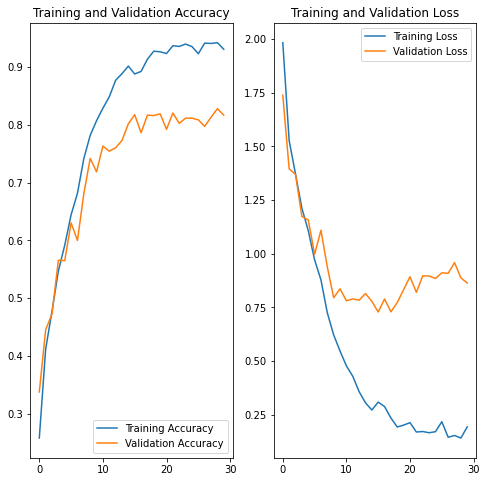

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



From this plot we can see that after solving the class imbalance problem the performance of the model has increased. Both training and validation accuracy have gone up. Both Training and validation accuracy are also close enough, with Final Training accuracy at 93% and final validation accuracy at 81%.

However, we can see considerable difference between the final training and validation loss. Validation loss is much higher than training loss, which means that our model still has some overfitting happening. And we must try improving this further.